a: 1.17085083
b: 0.03498359


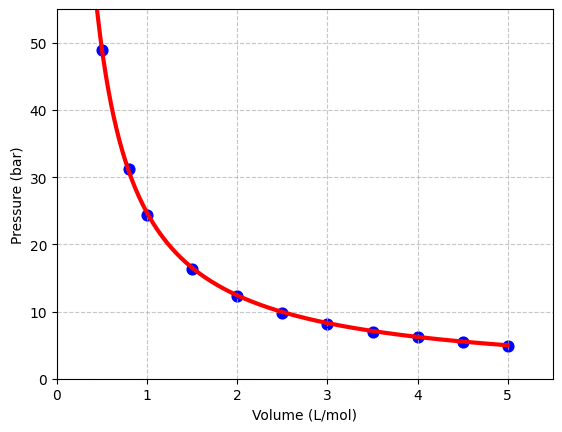

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

volume = np.array([0.5, 0.8, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
pressure = np.array([48.9, 31.2, 24.4, 16.3, 12.3, 9.8, 8.2, 7.0, 6.2, 5.5, 4.9])
R, T = 0.0831446, 300

def van_der_waals(V, a, b):
    return (R * T) / (V - b) - a / (V**2)

params, covariance = curve_fit(van_der_waals, volume, pressure, p0=[1.0, 0.1], bounds=([0, 0], [np.inf, np.inf]), maxfev=10000)
a_fit, b_fit = params
print(f"a: {a_fit:.8f}")
print(f"b: {b_fit:.8f}")

volume_fine = np.linspace(b_fit + 0.01, max(volume), 500)
pressure_fit = van_der_waals(volume_fine, a_fit, b_fit)

plt.scatter(volume, pressure, color='blue', s=60)
plt.plot(volume_fine, pressure_fit, 'r-', linewidth=3)
plt.xlabel('Volume (L/mol)')
plt.ylabel('Pressure (bar)')
plt.xlim(0, 5.5)
plt.ylim(0, 55)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
